SETUP

In [2]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
import qkeras
from qkeras import *

In [3]:
X_10x4 = np.load("/Users/jackcleeve/Desktop/bnb_WithWire_00_pureNu_batch_00_10X4.npy")

In [4]:
X_10x4.shape

(2560, 864, 64, 1)

In [5]:
from qkeras.utils import _add_supported_quantized_objects
co = {}
_add_supported_quantized_objects(co)

In [6]:
#model = keras.models.load_model("noQDB_seq", custom_objects=co)
teacher = keras.models.load_model('/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/Cicada_Models/teacher_10X4')
student_seq = qkeras.utils.load_qmodel('/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/Cicada_Models/student_sequential_10X4')
noqdb =  keras.models.load_model("/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/Cicada_Models/noQDB_seq", custom_objects=co)
cicada_2 = qkeras.utils.load_qmodel('/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/Cicada_Models/Cicada2_tiles10X4_full17')
cicada_3 = qkeras.utils.load_qmodel('/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/Cicada_Models/Cicada3_tiles10X4')

In [7]:
import hls4ml
import QDenseBatchnorm


In [8]:
student_seq_config = hls4ml.utils.config_from_keras_model(student_seq, backend='Vitis', 
                                              default_precision='fixed<32,16>',
                                              granularity='name')

Interpreting Sequential
Topology:
Layer name: reshape_input, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 55296]], output shape: [None, 864, 64, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 864, 64, 1]], output shape: [None, 432, 32, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 432, 32, 4]], output shape: [None, 432, 32, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 432, 32, 4]], output shape: [None, 55296]
Layer name: dense1, layer type: QDenseBatchnorm, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]


/Users/jackcleeve/anaconda3/envs/fastml310/lib/python3.10/site-packages/keras/src/constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'qkeras.quantizers.quantized_bits'>, which may lead to improper serialization.
  warnings.warn(


In [9]:
noqdb_config = hls4ml.utils.config_from_keras_model(noqdb, backend='Vitis', 
                                              default_precision='fixed<32,16>',
                                              granularity='name')

Interpreting Sequential
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: dense1, layer type: QDense, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]


In [10]:
c2_config = hls4ml.utils.config_from_keras_model(cicada_2, backend='Vitis', 
                                              default_precision='fixed<32,16>',
                                              granularity='name')

Interpreting Model
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 55296]], output shape: [None, 864, 64, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 864, 64, 1]], output shape: [None, 432, 32, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 432, 32, 4]], output shape: [None, 432, 32, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 432, 32, 4]], output shape: [None, 55296]
Layer name: dense1, layer type: QDense, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]


In [11]:
c3_config = hls4ml.utils.config_from_keras_model(cicada_3, backend='Vitis', 
                                              default_precision='fixed<32,16>',
                                              granularity='name')

Interpreting Model
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 55296]], output shape: [None, 864, 64, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 864, 64, 1]], output shape: [None, 432, 32, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 432, 32, 4]], output shape: [None, 432, 32, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 432, 32, 4]], output shape: [None, 55296]
Layer name: dense1, layer type: QDense, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]


In [12]:
for layer in student_seq_config['LayerName'].keys():
    student_seq_config['LayerName'][layer]['Trace'] = True
for layer in noqdb_config['LayerName'].keys():
    noqdb_config['LayerName'][layer]['Trace'] = True
for layer in cicada_2['LayerName'].keys():
    cicada_2['LayerName'][layer]['Trace'] = True
for layer in cicada_3['LayerName'].keys():
    cicada_3['LayerName'][layer]['Trace'] = True

TypeError: 'Functional' object is not subscriptable

In [13]:
hls_model_ss = hls4ml.converters.convert_from_keras_model(student_seq,
                                                       hls_config=student_seq_config,
                                                       io_type='io_parallel',
                                                       output_dir=f'complex_hls4mlproj')

Interpreting Sequential
Topology:
Layer name: reshape_input, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 55296]], output shape: [None, 864, 64, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 864, 64, 1]], output shape: [None, 432, 32, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 432, 32, 4]], output shape: [None, 432, 32, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 432, 32, 4]], output shape: [None, 55296]
Layer name: dense1, layer type: QDenseBatchnorm, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]
Creating HLS model


In [14]:
hls_model_noqdb = hls4ml.converters.convert_from_keras_model(noqdb,
                                                       hls_config=noqdb_config,
                                                       io_type='io_parallel',
                                                       output_dir=f'noQBQ_hls4mlproj')

Interpreting Sequential
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: dense1, layer type: QDense, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]
Creating HLS model


In [15]:
hls_model_c2 = hls4ml.converters.convert_from_keras_model(cicada_2,
                                                       hls_config=c2_config,
                                                       io_type='io_parallel',
                                                       output_dir=f'cicada2_10x4_hls4mlproj')

Interpreting Model
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 55296]], output shape: [None, 864, 64, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 864, 64, 1]], output shape: [None, 432, 32, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 432, 32, 4]], output shape: [None, 432, 32, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 432, 32, 4]], output shape: [None, 55296]
Layer name: dense1, layer type: QDense, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]
Creating HLS model


In [16]:
hls_model_c3 = hls4ml.converters.convert_from_keras_model(cicada_3,
                                                       hls_config=c3_config,
                                                       io_type='io_parallel',
                                                       output_dir=f'cicada3_10x4_hls4mlproj')

Interpreting Model
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 55296]], output shape: [None, 864, 64, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 864, 64, 1]], output shape: [None, 432, 32, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 432, 32, 4]], output shape: [None, 432, 32, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 432, 32, 4]], output shape: [None, 55296]
Layer name: dense1, layer type: QDense, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]
Creating HLS model


In [17]:
X_flat = X_10x4.reshape((2560,-1))

In [18]:
X_flat.shape

(2560, 55296)

In [19]:
def loss(y_true, y_pred, choice):
    if choice == 'mse':
        loss = np.mean((y_true - y_pred)**2, axis = (1,2,3))
        return loss

ntimeticks = 6400
nwire = 3456
f_downsample = 10
h_split = 10
v_split = 4
nbatch = 32

strategy = tf.distribute.MirroredStrategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

adccutoff = 10.*f_downsample/10.
adcsaturation = 100.*f_downsample/10.

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Number of devices: 1


COMPILING AND PREDICTING

In [20]:
Y_qdb = noqdb.predict(X_flat)

80/80 [==============================] - 0s 3ms/step


In [22]:
#Y = student_test.predict(X_flat)

X_predict_teacher = teacher.predict(X_10x4)
X_loss_teacher = loss(X_10x4, X_predict_teacher, 'mse')
X_student = X_10x4.reshape((-1,nwire*ntimeticks//f_downsample//v_split//h_split,1))

Y_ss = student_seq.predict(X_student).reshape(len(X_loss_teacher))
Y_c2 = cicada_2.predict(X_student).reshape(len(X_loss_teacher))
Y_c3 = cicada_3.predict(X_student).reshape(len(X_loss_teacher))


80/80 [==============================] - 1s 10ms/step


In [23]:
hls_model_ss.compile()
hls_model_noqdb.compile()
hls_model_c2.compile()
hls_model_c3.compile()

Writing HLS project


/Users/jackcleeve/anaconda3/envs/fastml310/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/jackcleeve/anaconda3/envs/fastml310/lib/python3.10/site-packages/keras/src/constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'qkeras.quantizers.quantized_bits'>, which may lead to improper serialization.
  warnings.warn(


Done
Writing HLS project
Done
Writing HLS project
Done
Writing HLS project
Done


In [24]:
Y_hls_ss = hls_model_ss.predict(np.ascontiguousarray(X_10x4.reshape((-1,nwire*ntimeticks//f_downsample//v_split//h_split,1)))).reshape(len(X_loss_teacher))

In [25]:
Y_hls_noqbd = hls_model_noqdb.predict(X_flat)

In [26]:
Y_hls_c2 = hls_model_c2.predict(np.ascontiguousarray(X_10x4.reshape((-1,nwire*ntimeticks//f_downsample//v_split//h_split,1)))).reshape(len(X_loss_teacher))

In [27]:
Y_hls_c3 = hls_model_c3.predict(np.ascontiguousarray(X_10x4.reshape((-1,nwire*ntimeticks//f_downsample//v_split//h_split,1)))).reshape(len(X_loss_teacher))

RESULTS

In [28]:
import matplotlib.pyplot as plt

In [29]:
y_hls_all = Y_hls_ss+Y_hls_noqbd+Y_hls_c2+Y_hls_c3

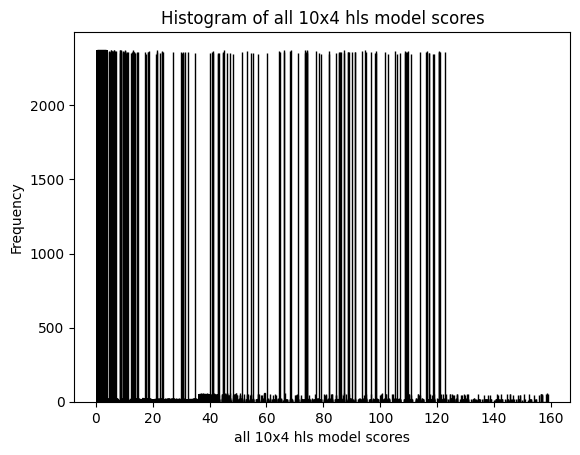

In [31]:
plt.hist(y_hls_all, bins=40, edgecolor='black')
plt.xlabel('all 10x4 hls model scores')
plt.ylabel('Frequency')
plt.title('Histogram of all 10x4 hls model scores')
plt.show()

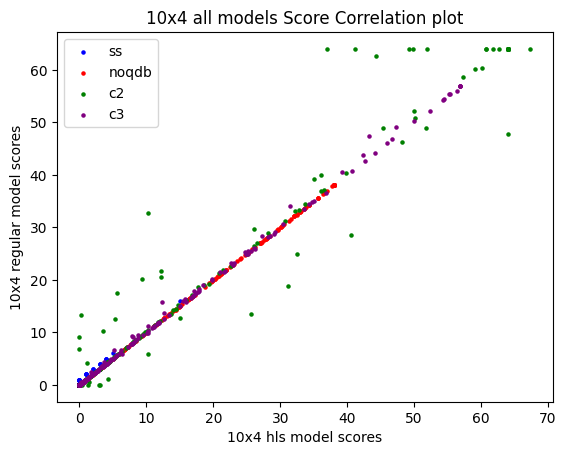

In [34]:
plt.scatter(Y_hls_ss, Y_ss, s=5, color="blue", label='ss')
plt.scatter(Y_hls_noqbd, Y_qdb, s=5, color="red", label="noqdb")
plt.scatter(Y_hls_c2, Y_c2, s=5, color="green", label="c2")
plt.scatter(Y_hls_c3, Y_c3, s=5, color="purple", label="c3")

plt.xlabel('10x4 hls model scores')
plt.ylabel('10x4 regular model scores')
plt.title('10x4 all models Score Correlation plot')
plt.legend()
plt.show()